In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Configurações adicionais
plt.style.use('seaborn-v0_8-darkgrid')


In [46]:
# Carregar o arquivo 'dados.xlsx'
dados = pd.read_excel('dados.xlsx')

# Converter campos de texto para os tipos apropriados
dados['Data'] = pd.to_datetime(dados['Data'], format='%Y-%m-%d')
dados['Fechamento'] = pd.to_numeric(dados['Fechamento'], errors='coerce')
dados['Fechamento_Padronizado'] = pd.to_numeric(dados['Fechamento_Padronizado'], errors='coerce')

# Verificar o DataFrame resultante
print(dados.head())


        Data  Fechamento  Fechamento_Padronizado Simbolo     Ramo
0 2007-01-02     5617.71                0.588751  CAC 40  Indices
1 2007-01-03     5610.92                0.583207  CAC 40  Indices
2 2007-01-04     5574.56                0.553518  CAC 40  Indices
3 2007-01-05     5517.35                0.506803  CAC 40  Indices
4 2007-01-08     5518.59                0.507816  CAC 40  Indices


# Estudo 1

In [47]:
# Parâmetros globais
DATA_INICIO = '2014-01-01'
DATA_FIM = '2023-12-31'
DATA_EVENTO_INICIO = '2020-03-01'
DATA_EVENTO_FIM = '2020-03-31'

# Atualizar filtros e cálculos utilizando essas variáveis


In [48]:
# Definir os ramos que deseja analisar
ramos_analise = dados['Ramo'].unique()

# Dicionário para armazenar retornos e volatilidades por ramo
retornos_medios = {}
volatilidades = {}

for ramo in ramos_analise:
    dados_ramo = dados[dados['Ramo'] == ramo]
    
    # Calcular retornos médios anuais
    retornos_anuais = dados_ramo.groupby(dados_ramo['Data'].dt.year)['Fechamento_Padronizado'].mean()
    retornos_medios[ramo] = retornos_anuais
    
    # Calcular volatilidade anual
    volatilidade_anual = dados_ramo.groupby(dados_ramo['Data'].dt.year)['Fechamento_Padronizado'].std()
    volatilidades[ramo] = volatilidade_anual


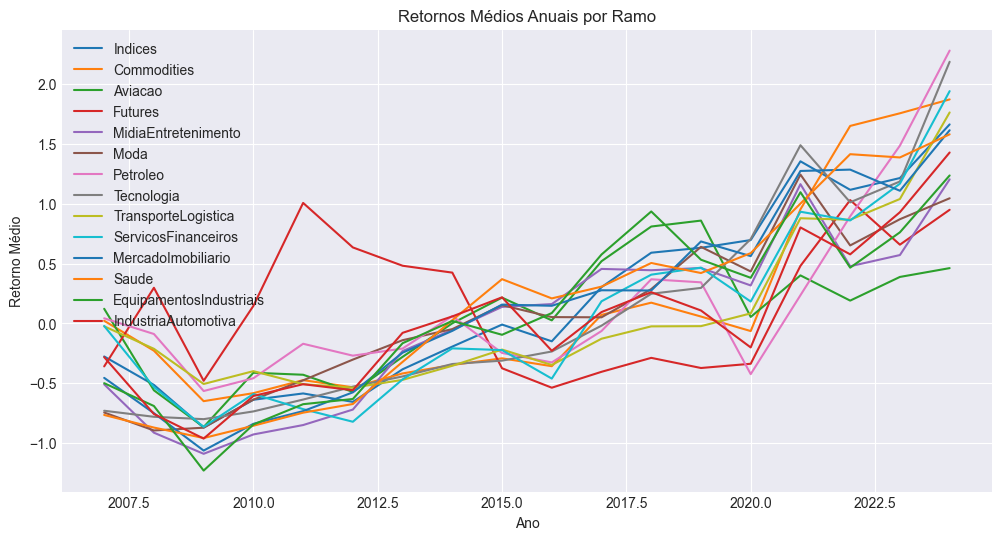

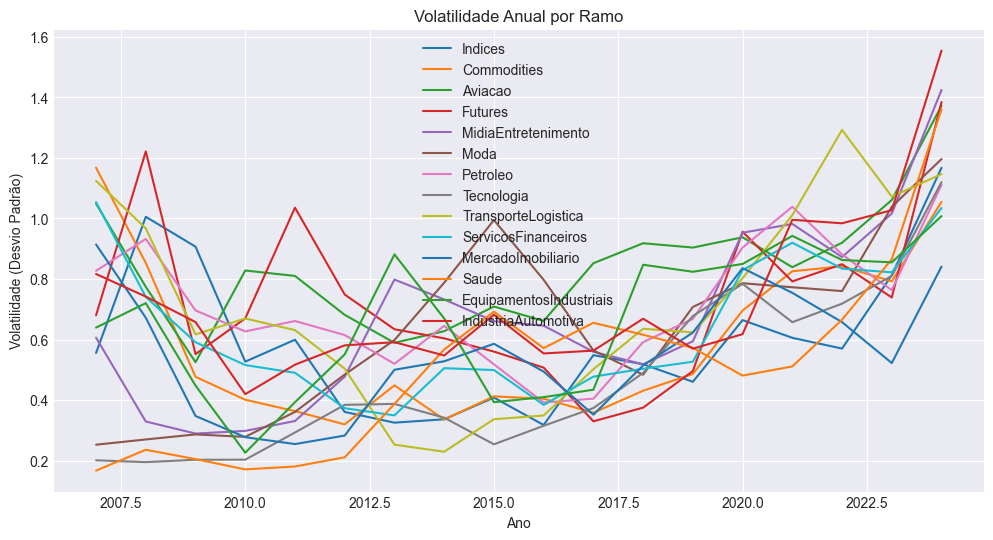

In [49]:
# Plotar retornos médios anuais por ramo
plt.figure(figsize=(12, 6))

for ramo, retornos in retornos_medios.items():
    plt.plot(retornos.index, retornos.values, label=ramo)

plt.title('Retornos Médios Anuais por Ramo')
plt.xlabel('Ano')
plt.ylabel('Retorno Médio')
plt.legend()
plt.show()

# Plotar volatilidade anual por ramo
plt.figure(figsize=(12, 6))

for ramo, vol in volatilidades.items():
    plt.plot(vol.index, vol.values, label=ramo)

plt.title('Volatilidade Anual por Ramo')
plt.xlabel('Ano')
plt.ylabel('Volatilidade (Desvio Padrão)')
plt.legend()
plt.show()


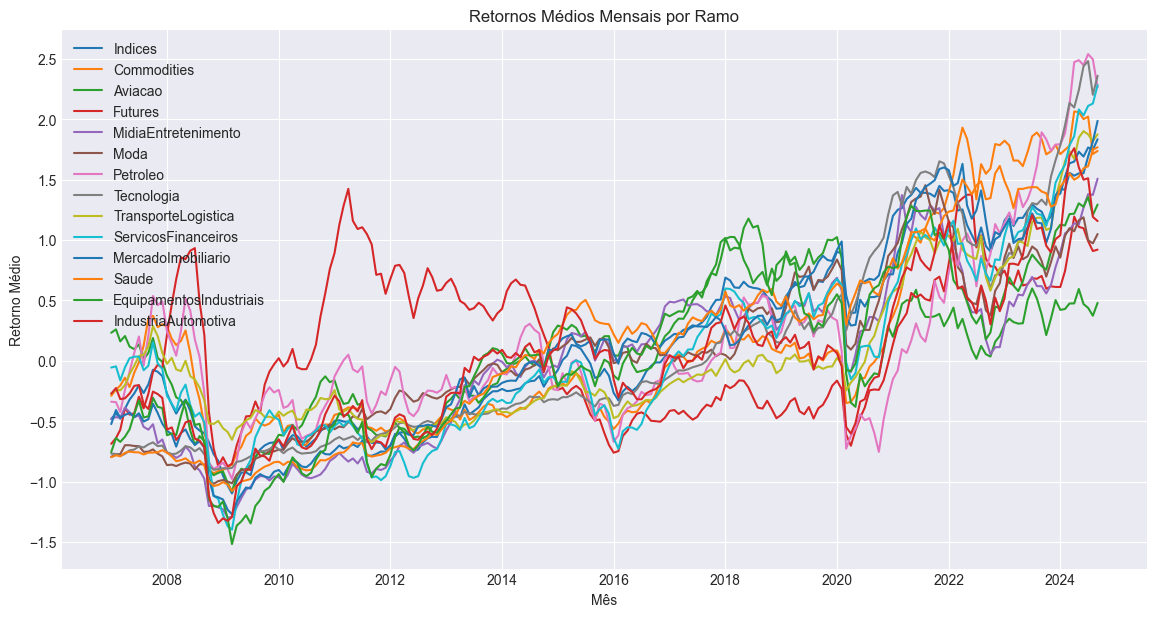

In [50]:
# Dicionário para armazenar retornos médios mensais por ramo
retornos_medios_mensais = {}

for ramo in ramos_analise:
    dados_ramo = dados[dados['Ramo'] == ramo]
    
    # Calcular retornos médios mensais
    retornos_mensais = dados_ramo.groupby(dados_ramo['Data'].dt.to_period('M'))['Fechamento_Padronizado'].mean()
    retornos_medios_mensais[ramo] = retornos_mensais

# Plotar retornos médios mensais por ramo
plt.figure(figsize=(14, 7))

for ramo, retornos in retornos_medios_mensais.items():
    plt.plot(retornos.index.to_timestamp(), retornos.values, label=ramo)

plt.title('Retornos Médios Mensais por Ramo')
plt.xlabel('Mês')
plt.ylabel('Retorno Médio')
plt.legend()
plt.show()


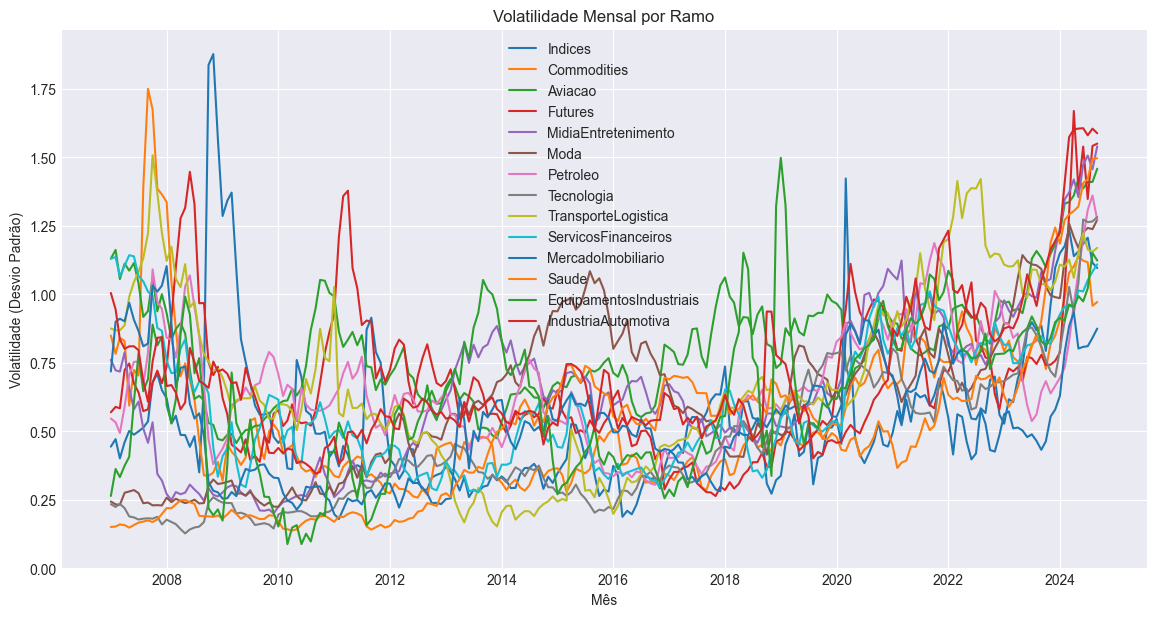

In [51]:
# Dicionário para armazenar volatilidades mensais por ramo
volatilidades_mensais = {}

for ramo in ramos_analise:
    dados_ramo = dados[dados['Ramo'] == ramo]
    
    # Calcular volatilidade mensal
    volatilidade_mensal = dados_ramo.groupby(dados_ramo['Data'].dt.to_period('M'))['Fechamento_Padronizado'].std()
    volatilidades_mensais[ramo] = volatilidade_mensal

# Plotar volatilidade mensal por ramo
plt.figure(figsize=(14, 7))

for ramo, vol in volatilidades_mensais.items():
    plt.plot(vol.index.to_timestamp(), vol.values, label=ramo)

plt.title('Volatilidade Mensal por Ramo')
plt.xlabel('Mês')
plt.ylabel('Volatilidade (Desvio Padrão)')
plt.legend()
plt.show()


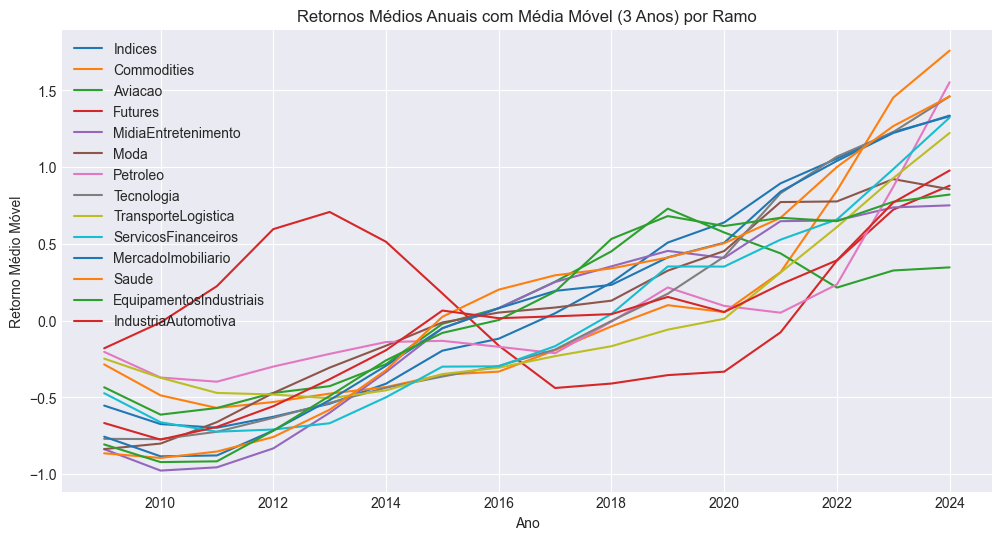

In [52]:
# Aplicar média móvel de 3 anos aos retornos médios anuais
plt.figure(figsize=(12, 6))

for ramo, retornos in retornos_medios.items():
    retornos_ma = retornos.rolling(window=3).mean()
    plt.plot(retornos_ma.index, retornos_ma.values, label=ramo)

plt.title('Retornos Médios Anuais com Média Móvel (3 Anos) por Ramo')
plt.xlabel('Ano')
plt.ylabel('Retorno Médio Móvel')
plt.legend()
plt.show()


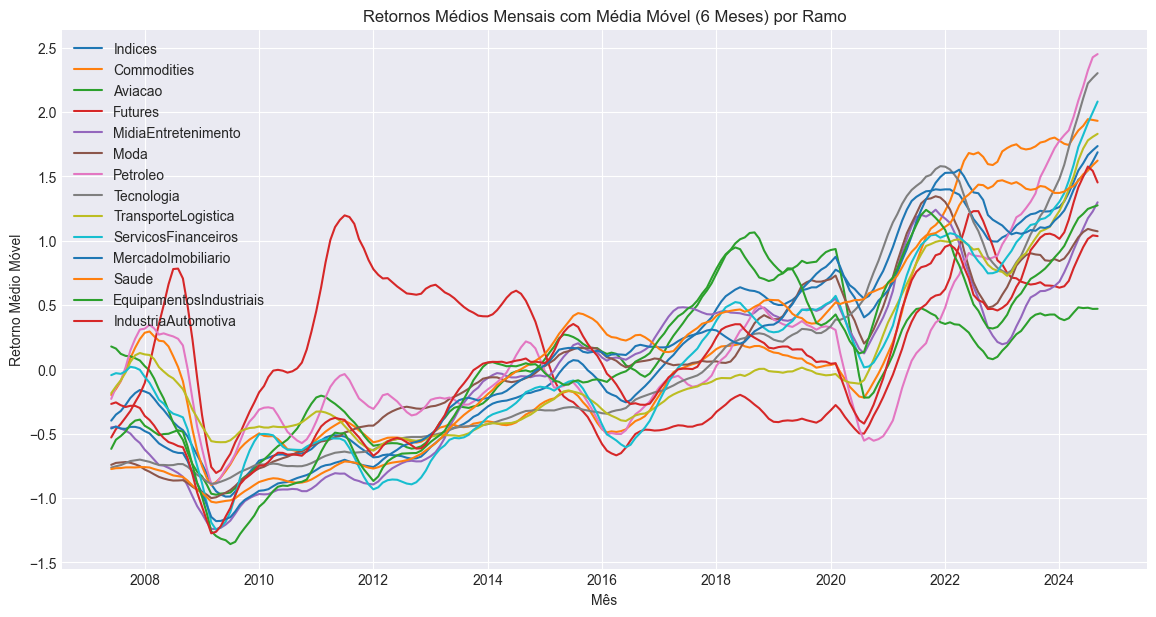

In [53]:
# Aplicar média móvel de 6 meses aos retornos médios mensais
plt.figure(figsize=(14, 7))

for ramo, retornos in retornos_medios_mensais.items():
    retornos_ma = retornos.rolling(window=6).mean()
    plt.plot(retornos_ma.index.to_timestamp(), retornos_ma.values, label=ramo)

plt.title('Retornos Médios Mensais com Média Móvel (6 Meses) por Ramo')
plt.xlabel('Mês')
plt.ylabel('Retorno Médio Móvel')
plt.legend()
plt.show()


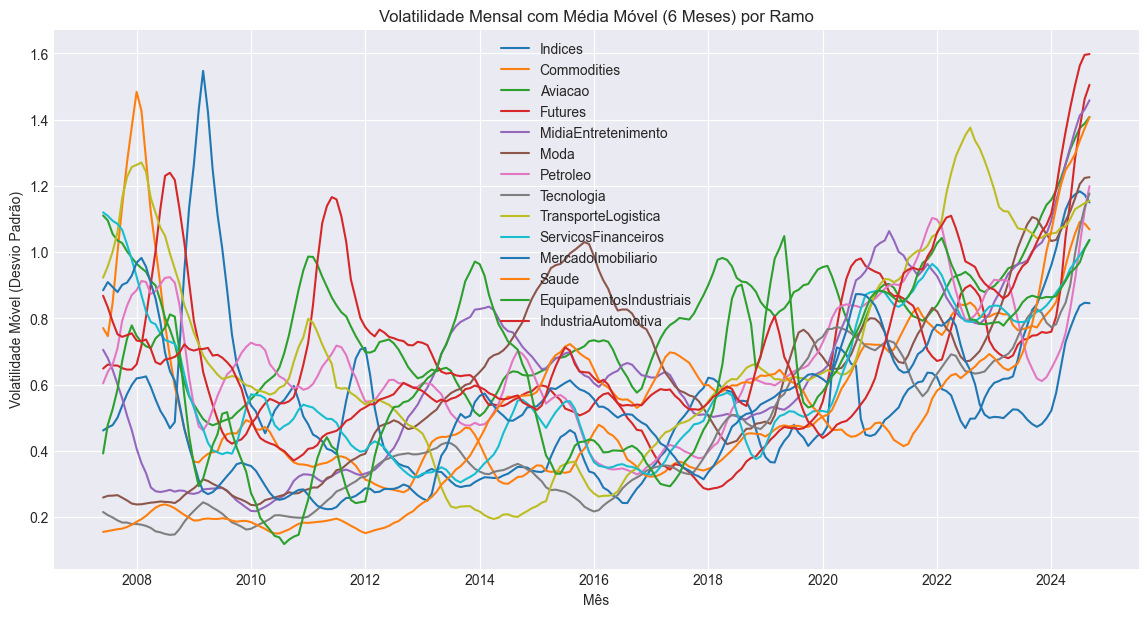

In [54]:
# Aplicar média móvel de 6 meses às volatilidades mensais
plt.figure(figsize=(14, 7))

for ramo, vol in volatilidades_mensais.items():
    volatilidade_ma = vol.rolling(window=6).mean()
    plt.plot(volatilidade_ma.index.to_timestamp(), volatilidade_ma.values, label=ramo)

plt.title('Volatilidade Mensal com Média Móvel (6 Meses) por Ramo')
plt.xlabel('Mês')
plt.ylabel('Volatilidade Móvel (Desvio Padrão)')
plt.legend()
plt.show()


In [55]:
# Calcular o retorno diário para cada ação se ainda não tiver sido calculado
dados.sort_values(by=['Simbolo', 'Data'], inplace=True)
dados['Retorno_Acao'] = dados.groupby('Simbolo')['Fechamento_Padronizado'].pct_change(fill_method=None)
dados.dropna(subset=['Retorno_Acao'], inplace=True)

# Calcular o retorno diário médio por ramo
dados_pca = dados.groupby(['Data', 'Ramo'])['Retorno_Acao'].mean().reset_index()

# Pivotar a tabela para ter ramos como colunas e datas como índice
dados_pca_pivot = dados_pca.pivot(index='Data', columns='Ramo', values='Retorno_Acao')

# Remover linhas com valores nulos
dados_pca_pivot.dropna(inplace=True)


In [81]:
from sklearn.preprocessing import StandardScaler

# Padronizar os dados
scaler = StandardScaler()
dados_pca_scaled = scaler.fit_transform(dados_pca_pivot)


In [82]:
from sklearn.decomposition import PCA

# Definir o número de componentes principais
n_components = min(dados_pca_scaled.shape[1], 5)
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(dados_pca_scaled)

# Criar um DataFrame com os componentes principais
df_pca = pd.DataFrame(data=principal_components, index=dados_pca_pivot.index, columns=[f'PC{i+1}' for i in range(n_components)])


Variância explicada por cada componente principal:
PC1: 7.54%
PC2: 7.41%
PC3: 7.28%
PC4: 7.23%
PC5: 7.21%


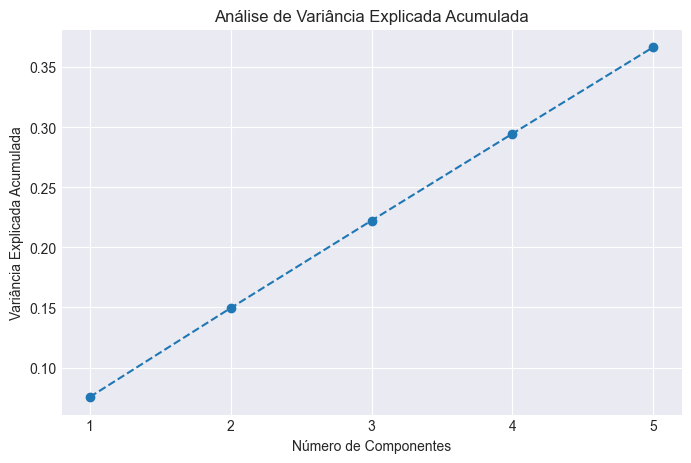

In [83]:
# Variância explicada por cada componente principal
variancia_explicada = pca.explained_variance_ratio_
print('Variância explicada por cada componente principal:')
for i, var_exp in enumerate(variancia_explicada):
    print(f'PC{i+1}: {var_exp:.2%}')

# Plotar variância explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(variancia_explicada) + 1), np.cumsum(variancia_explicada), marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Análise de Variância Explicada Acumulada')
plt.xticks(range(1, len(variancia_explicada) + 1))
plt.grid(True)
plt.show()


In [90]:
# Remover linhas com valores nulos
dados_pca_pivot.dropna(inplace=True)

# Verificar desvio padrão de cada coluna
std_dev = dados_pca_pivot.std()
colunas_constantes = std_dev[std_dev == 0].index.tolist()

# Se houver colunas constantes, removê-las
if colunas_constantes:
    print('Removendo colunas constantes:', colunas_constantes)
    dados_pca_pivot.drop(columns=colunas_constantes, inplace=True)

# Padronizar os dados novamente
scaler = StandardScaler()
dados_pca_scaled = scaler.fit_transform(dados_pca_pivot)

# Aplicar PCA novamente
n_components = min(dados_pca_scaled.shape[1], 5)
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(dados_pca_scaled)

# Criar DataFrame com os loadings
loadings = pd.DataFrame(pca.components_.T, index=dados_pca_pivot.columns, columns=[f'PC{i+1}' for i in range(n_components)])

# Verificar se o DataFrame `loadings` está vazio
print('O DataFrame `loadings` está vazio?', loadings.empty)

# Exibir os loadings
print('Loadings dos Componentes Principais:')
print(loadings)


O DataFrame `loadings` está vazio? False
Loadings dos Componentes Principais:
                              PC1       PC2       PC3       PC4       PC5
Ramo                                                                     
Aviacao                  0.016687 -0.009238  0.195356 -0.169220 -0.470422
Commodities              0.211377 -0.000291 -0.316189  0.113570  0.200846
EquipamentosIndustriais  0.032037 -0.020226 -0.221907  0.157812  0.364031
Futures                  0.207943 -0.156408 -0.247996  0.592268 -0.308715
Indices                  0.061285  0.652950 -0.180362  0.005334 -0.144572
IndustriaAutomotiva     -0.008140  0.006069 -0.173805 -0.010890  0.533781
MercadoImobiliario       0.617752  0.004169  0.056165 -0.212358 -0.071161
MidiaEntretenimento     -0.026005  0.354611  0.573854  0.081863  0.361828
Moda                     0.068879 -0.626421  0.240446 -0.038101  0.172960
Petroleo                 0.074821 -0.019208 -0.177867  0.346589  0.008462
Saude                    0.655266 

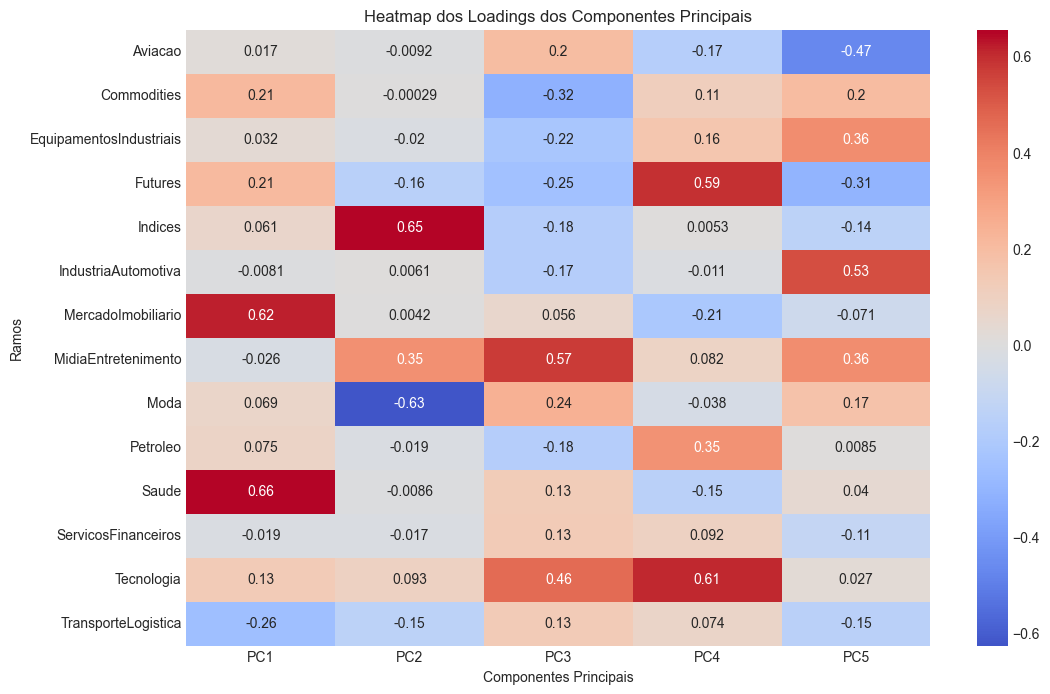

In [92]:
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap dos Loadings dos Componentes Principais')
plt.xlabel('Componentes Principais')
plt.ylabel('Ramos')
plt.show()


# Estudo 2

In [61]:
# Separar dados dos índices e das empresas
dados_indices = dados[dados['Ramo'] == 'Indices'].copy()
dados_empresas = dados[dados['Ramo'] != 'Indices'].copy()

# Converter 'Data' em índice
dados_indices.set_index('Data', inplace=True)
dados_empresas.set_index('Data', inplace=True)

# Selecionar o índice de mercado que deseja usar (por exemplo, S&P 500)
indice_mercado = dados_indices[dados_indices['Simbolo'] == 'S&P 500'].copy()

# Calcular retornos diários do índice de mercado
indice_mercado['Retorno'] = indice_mercado['Fechamento'].pct_change()

# Preparar dados das empresas
dados_empresas['Retorno_Acao'] = dados_empresas.groupby('Simbolo')['Fechamento'].pct_change()

# Unir dados das empresas com o índice de mercado
dados_merged = dados_empresas.join(indice_mercado['Retorno'], how='inner', rsuffix='_Indice')

# Remover valores nulos
dados_merged.dropna(subset=['Retorno', 'Retorno_Acao'], inplace=True)

# Calcular correlação e beta para cada empresa
resultados = []

for simbolo in dados_merged['Simbolo'].unique():
    dados_empresa = dados_merged[dados_merged['Simbolo'] == simbolo]
    correlacao = dados_empresa['Retorno_Acao'].corr(dados_empresa['Retorno'])
    beta = np.polyfit(dados_empresa['Retorno'], dados_empresa['Retorno_Acao'], 1)[0]
    ramo = dados_empresa['Ramo'].iloc[0]  # Obter o ramo da empresa
    resultados.append({'Simbolo': simbolo, 'Ramo': ramo, 'Correlacao': correlacao, 'Beta': beta})

df_resultados = pd.DataFrame(resultados)


,Simbolo,Ramo,Correlacao,Beta
114,Japan Airlines,Aviacao,0.001059,2.508181
136,Morgan Stanley,ServicosFinanceiros,0.718418,1.793429
34,CBRE,MercadoImobiliario,0.652350,1.778615
55,Citigroup,ServicosFinanceiros,0.660343,1.705911
27,Banco do Brasil,ServicosFinanceiros,0.682046,1.668840
...,...,...,...,...
94,GrainCorp,Commodities,0.048130,0.082614
174,Sakata Seed,Commodities,0.061531,0.079995
52,China Steel,Commodities,0.070653,0.079378
150,Ouro,Futures,0.029383,0.025719


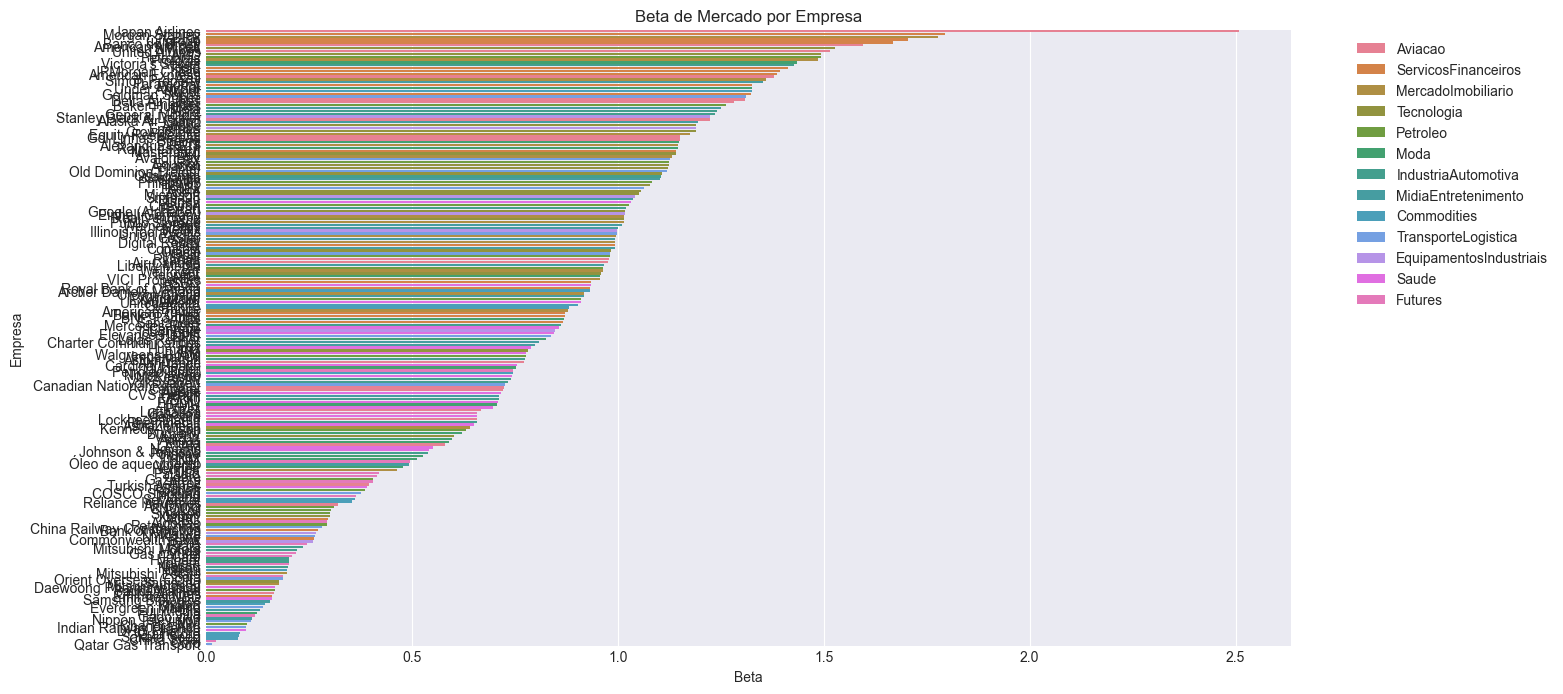

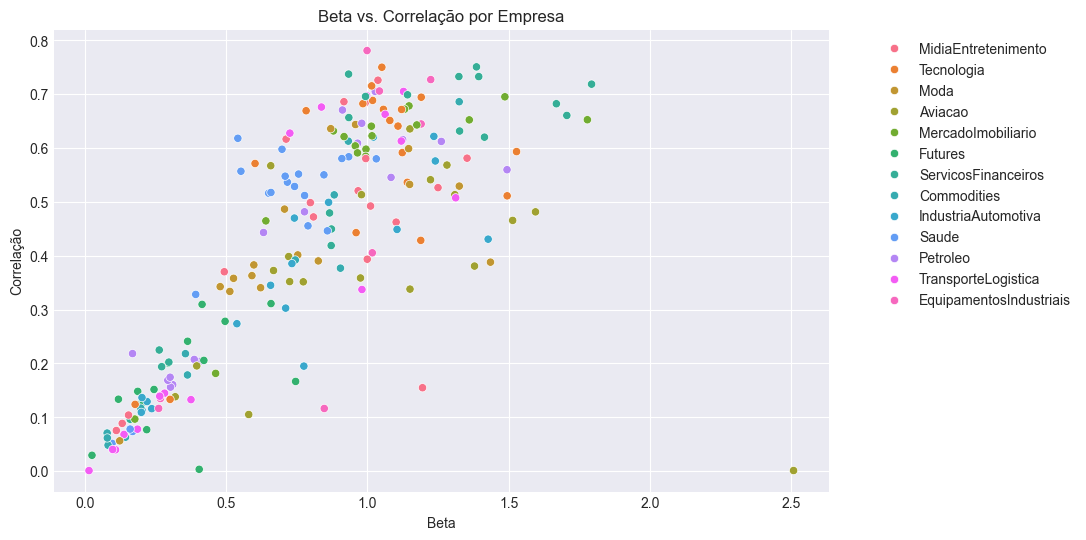

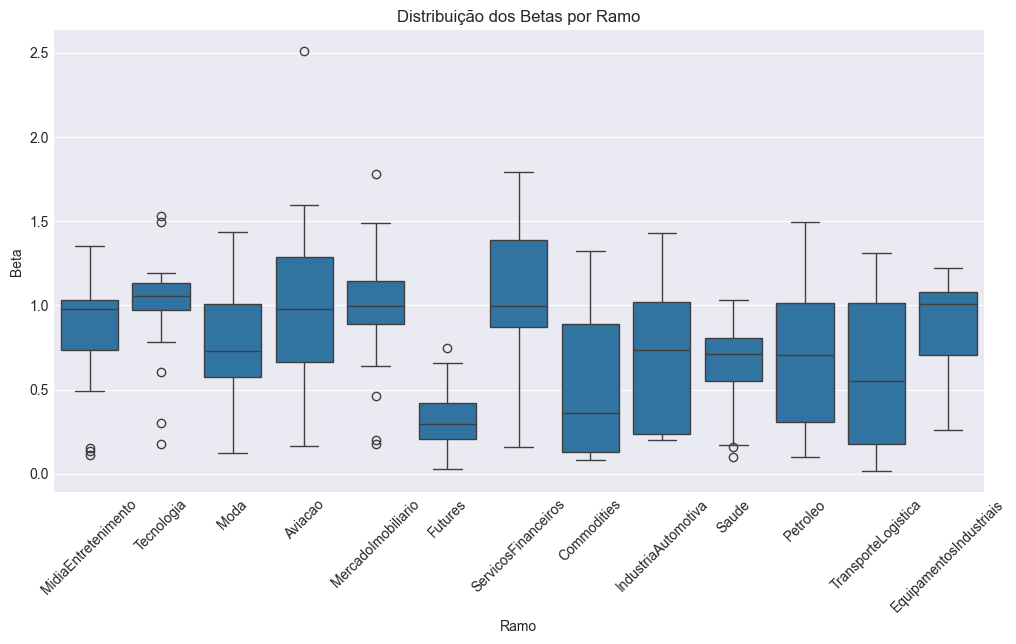

In [62]:
# Exibir tabela de correlações e betas
display(df_resultados.sort_values(by='Beta', ascending=False))

# Plotar beta de cada empresa, agrupado por ramo
plt.figure(figsize=(14, 8))
sns.barplot(x='Beta', y='Simbolo', hue='Ramo', data=df_resultados.sort_values(by='Beta', ascending=False), dodge=False)
plt.title('Beta de Mercado por Empresa')
plt.xlabel('Beta')
plt.ylabel('Empresa')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plotar Beta vs. Correlação
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Beta', y='Correlacao', hue='Ramo', data=df_resultados)
plt.title('Beta vs. Correlação por Empresa')
plt.xlabel('Beta')
plt.ylabel('Correlação')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Ramo', y='Beta', data=df_resultados)
plt.title('Distribuição dos Betas por Ramo')
plt.xlabel('Ramo')
plt.ylabel('Beta')
plt.xticks(rotation=45)
plt.show()




## Preparação dos dados

In [63]:
# Separar dados dos índices e das empresas
dados_indices = dados[dados['Ramo'] == 'Indices'].copy()
dados_empresas = dados[dados['Ramo'] != 'Indices'].copy()

# Converter 'Data' em datetime e definir como índice
dados_indices['Data'] = pd.to_datetime(dados_indices['Data'])
dados_empresas['Data'] = pd.to_datetime(dados_empresas['Data'])

dados_indices.set_index('Data', inplace=True)
dados_empresas.set_index('Data', inplace=True)


In [64]:
# Selecionar o índice de mercado (exemplo: S&P 500)
indice_mercado = dados_indices[dados_indices['Simbolo'] == 'S&P 500'].copy()

# Calcular retornos diários do índice de mercado
indice_mercado['Retorno'] = indice_mercado['Fechamento'].pct_change()


In [65]:
# Calcular retornos diários das ações
dados_empresas['Retorno_Acao'] = dados_empresas.groupby('Simbolo')['Fechamento'].pct_change()


In [66]:
# Unir dados das empresas com o índice de mercado
dados_merged = dados_empresas.join(indice_mercado['Retorno'], how='inner', rsuffix='_Indice')

# Remover valores nulos
dados_merged.dropna(subset=['Retorno', 'Retorno_Acao'], inplace=True)


## Calculo de Correlação e Beta

In [67]:
import statsmodels.api as sm

resultados = []

for simbolo in dados_merged['Simbolo'].unique():
    dados_empresa = dados_merged[dados_merged['Simbolo'] == simbolo]
    correlacao = dados_empresa['Retorno_Acao'].corr(dados_empresa['Retorno'])
    
    # Regressão linear para obter o beta
    X = sm.add_constant(dados_empresa['Retorno'])  # Adiciona constante para o intercepto
    model = sm.OLS(dados_empresa['Retorno_Acao'], X).fit()
    beta = model.params['Retorno']
    p_value = model.pvalues['Retorno']
    t_stat = model.tvalues['Retorno']
    
    ramo = dados_empresa['Ramo'].iloc[0]
    resultados.append({
        'Simbolo': simbolo,
        'Ramo': ramo,
        'Correlacao': correlacao,
        'Beta': beta,
        'p_value': p_value,
        't_stat': t_stat
    })

df_resultados = pd.DataFrame(resultados)


## Análise Estatística dos Coeficientes

In [68]:
# Adicionar uma coluna indicando se o beta é estatisticamente significativo (nível de significância de 5%)
df_resultados['Significativo'] = df_resultados['p_value'] < 0.05


In [69]:
# Exibir tabela de resultados
display(df_resultados.sort_values(by='Beta', ascending=False))


,Simbolo,Ramo,Correlacao,Beta,p_value,t_stat,Significativo
114,Japan Airlines,Aviacao,0.001059,2.508181,0.945240,0.068690,False
136,Morgan Stanley,ServicosFinanceiros,0.718418,1.793429,0.000000,68.988288,True
34,CBRE,MercadoImobiliario,0.652350,1.778615,0.000000,57.494035,True
55,Citigroup,ServicosFinanceiros,0.660343,1.705911,0.000000,58.737493,True
27,Banco do Brasil,ServicosFinanceiros,0.682046,1.668840,0.000000,62.298539,True
...,...,...,...,...,...,...,...
94,GrainCorp,Commodities,0.048130,0.082614,0.001458,3.184993,True
174,Sakata Seed,Commodities,0.061531,0.079995,0.000065,3.999529,True
52,China Steel,Commodities,0.070653,0.079378,0.000004,4.594652,True
150,Ouro,Futures,0.029383,0.025719,0.049716,1.962937,True


## Análise de Correlação Média por Ramo

In [88]:
# Filtrar empresas que não são 'Futures'
df_empresas = df_resultados[df_resultados['Ramo'] != 'Futures']

# Calcular correlação média e beta médio por ramo
media_correlacao_ramo = df_empresas.groupby('Ramo').agg({'Correlacao': 'mean', 'Beta': 'mean'}).reset_index()

# Ordenar por correlação
media_correlacao_ramo = media_correlacao_ramo.sort_values(by='Correlacao', ascending=False)

# Exibir tabela
display(media_correlacao_ramo)

media_correlacao_ramo = media_correlacao_ramo.sort_values(by='Beta', ascending=False)
display(media_correlacao_ramo)


,Ramo,Correlacao,Beta
10,Tecnologia,0.566543,0.996325
9,ServicosFinanceiros,0.546324,1.032834
4,MercadoImobiliario,0.541161,0.961106
8,Saude,0.460372,0.649821
2,EquipamentosIndustriais,0.453829,0.856384
5,MidiaEntretenimento,0.446175,0.835268
6,Moda,0.423850,0.789291
7,Petroleo,0.400867,0.696396
0,Aviacao,0.368576,1.003910
11,TransporteLogistica,0.341771,0.602420


,Ramo,Correlacao,Beta
9,ServicosFinanceiros,0.546324,1.032834
0,Aviacao,0.368576,1.003910
10,Tecnologia,0.566543,0.996325
4,MercadoImobiliario,0.541161,0.961106
2,EquipamentosIndustriais,0.453829,0.856384
5,MidiaEntretenimento,0.446175,0.835268
6,Moda,0.423850,0.789291
3,IndustriaAutomotiva,0.339434,0.712615
7,Petroleo,0.400867,0.696396
8,Saude,0.460372,0.649821


# Análise de Cointegração

In [71]:
from statsmodels.tsa.stattools import coint

# Lista para armazenar resultados de cointegração
coint_resultados = []

for simbolo in dados_merged['Simbolo'].unique():
    dados_empresa = dados_merged[dados_merged['Simbolo'] == simbolo]
    
    # Obter preços de fechamento da empresa e do índice alinhados
    y0 = dados_empresa['Fechamento']
    y1 = indice_mercado['Fechamento'].reindex(dados_empresa.index)
    
    # Combinar em um DataFrame e remover linhas com valores nulos
    df_coint_test = pd.DataFrame({'y0': y0, 'y1': y1}).dropna()
    
    # Certificar-se de que as séries têm o mesmo tamanho e estão alinhadas
    y0_clean = df_coint_test['y0']
    y1_clean = df_coint_test['y1']
    
    # Verificar se há dados suficientes para o teste
    if len(y0_clean) > 2:  # O teste de cointegração requer pelo menos 3 pontos
        # Teste de cointegração
        coint_t, p_value, crit_value = coint(y0_clean, y1_clean)
        
        coint_resultados.append({
            'Simbolo': simbolo,
            'Ramo': dados_empresa['Ramo'].iloc[0],
            'coint_t': coint_t,
            'p_value': p_value,
            'crit_value_1%': crit_value[0],
            'crit_value_5%': crit_value[1],
            'crit_value_10%': crit_value[2]
        })
    else:
        # Caso não haja dados suficientes, registrar como não disponível
        coint_resultados.append({
            'Simbolo': simbolo,
            'Ramo': dados_empresa['Ramo'].iloc[0],
            'coint_t': np.nan,
            'p_value': np.nan,
            'crit_value_1%': np.nan,
            'crit_value_5%': np.nan,
            'crit_value_10%': np.nan
        })

df_coint = pd.DataFrame(coint_resultados)


In [72]:
# Fazer analise de cointegração por ramo de atuação, não por empresas individuais

# Filtrar empresas que não são 'Futures'
df_empresas = df_coint[df_coint['Ramo'] != 'Futures']

# Calcular médias de cointegração por ramo
media_coint_ramo = df_empresas.groupby('Ramo').agg({'coint_t': 'mean', 'p_value': 'mean'}).reset_index()

# Ordenar por cointegração
media_coint_ramo = media_coint_ramo.sort_values(by='coint_t', ascending=False)

# Exibir tabela
display(media_coint_ramo)

,Ramo,coint_t,p_value
6,Moda,-1.579933,0.656640
10,Tecnologia,-1.898950,0.536091
5,MidiaEntretenimento,-2.003398,0.485779
4,MercadoImobiliario,-2.104021,0.497703
0,Aviacao,-2.127544,0.481751
8,Saude,-2.158690,0.464529
11,TransporteLogistica,-2.196851,0.437834
7,Petroleo,-2.351062,0.385089
2,EquipamentosIndustriais,-2.379364,0.367584
1,Commodities,-2.516672,0.298527


In [73]:
# Adicionar coluna indicando se há cointegração significativa
df_coint['Cointegrado'] = df_coint['p_value'] < 0.05

# Exibir resultados de cointegração
display(df_coint)


,Simbolo,Ramo,coint_t,p_value,crit_value_1%,crit_value_5%,crit_value_10%,Cointegrado
0,AMC,MidiaEntretenimento,-2.917363,0.131178,-3.900486,-3.338386,-3.046015,False
1,AMD,Tecnologia,-2.673629,0.209206,-3.898896,-3.337499,-3.045400,False
2,AT&T,MidiaEntretenimento,-2.466922,0.293849,-3.898896,-3.337499,-3.045400,False
3,Adidas,Moda,-1.243150,0.846237,-3.898936,-3.337522,-3.045416,False
4,Adobe,Tecnologia,-2.012366,0.522145,-3.898896,-3.337499,-3.045400,False
...,...,...,...,...,...,...,...,...
211,Walgreens Boots,Saude,-0.492767,0.964843,-3.898896,-3.337499,-3.045400,False
212,Warner Bros,MidiaEntretenimento,-2.253036,0.397207,-3.898896,-3.337499,-3.045400,False
213,Welltower,MercadoImobiliario,-2.662685,0.213285,-3.898896,-3.337499,-3.045400,False
214,Xiaomi,Tecnologia,-1.622202,0.711428,-3.903805,-3.340234,-3.047298,False


## Visualizações graficas

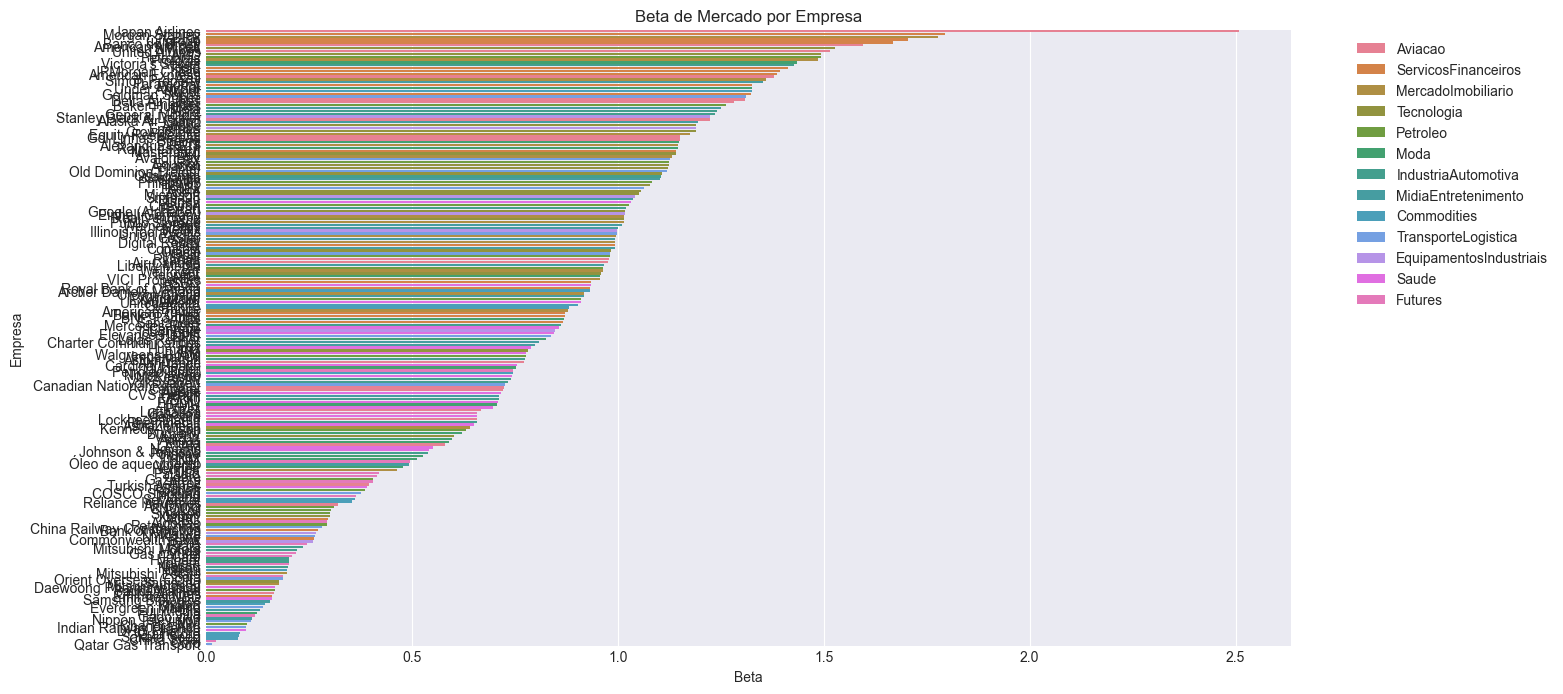

In [74]:
# Gráfico 1: Beta por Empresa (Agrupado por Ramo)

plt.figure(figsize=(14, 8))
sns.barplot(x='Beta', y='Simbolo', hue='Ramo', data=df_resultados.sort_values(by='Beta', ascending=False), dodge=False)
plt.title('Beta de Mercado por Empresa')
plt.xlabel('Beta')
plt.ylabel('Empresa')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


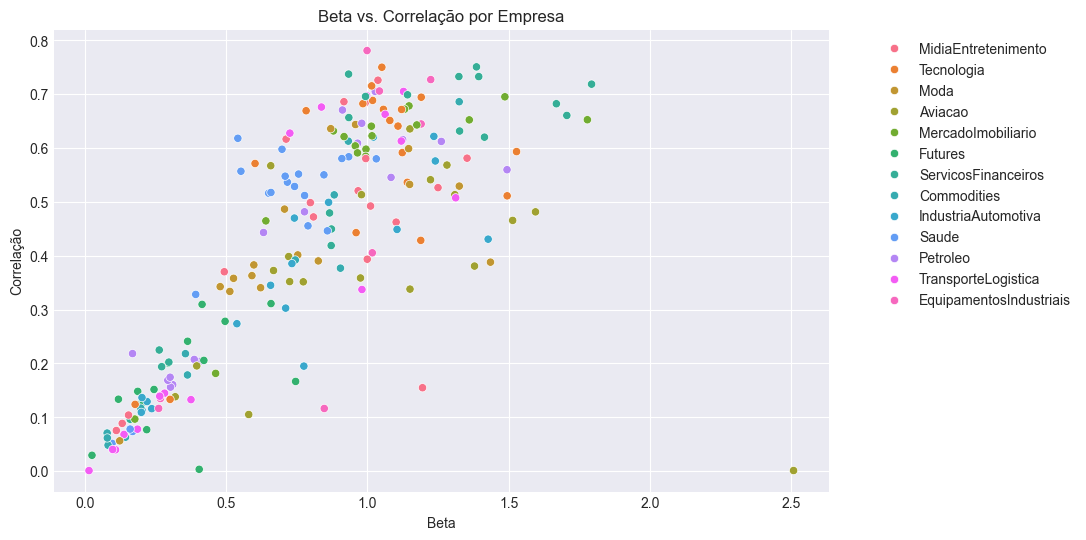

In [91]:
# Gráfico 2: Beta vs. Correlação por Empresa

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Beta', y='Correlacao', hue='Ramo', data=df_resultados)
plt.title('Beta vs. Correlação por Empresa')
plt.xlabel('Beta')
plt.ylabel('Correlação')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


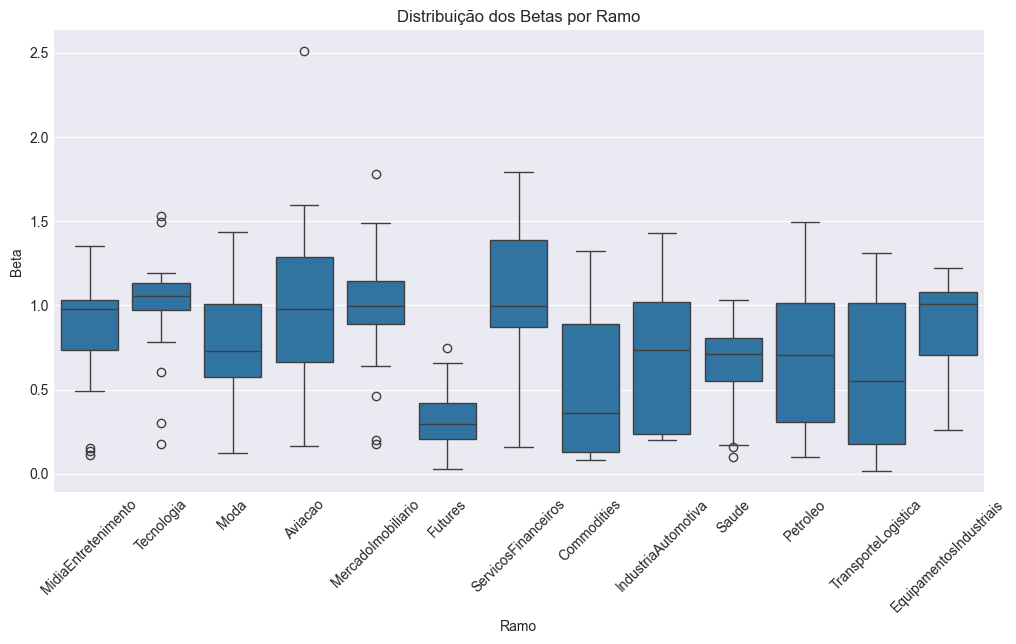

In [76]:
# Gráfico 3: Distribuição dos Betas por Ramo

plt.figure(figsize=(12, 6))
sns.boxplot(x='Ramo', y='Beta', data=df_resultados)
plt.title('Distribuição dos Betas por Ramo')
plt.xlabel('Ramo')
plt.ylabel('Beta')
plt.xticks(rotation=45)
plt.show()


,Ramo,Correlacao
0,Aviacao,0.368576
1,Commodities,0.278060
2,EquipamentosIndustriais,0.453829
3,IndustriaAutomotiva,0.339434
4,MercadoImobiliario,0.541161
5,MidiaEntretenimento,0.446175
6,Moda,0.423850
7,Petroleo,0.400867
8,Saude,0.460372
9,ServicosFinanceiros,0.546324


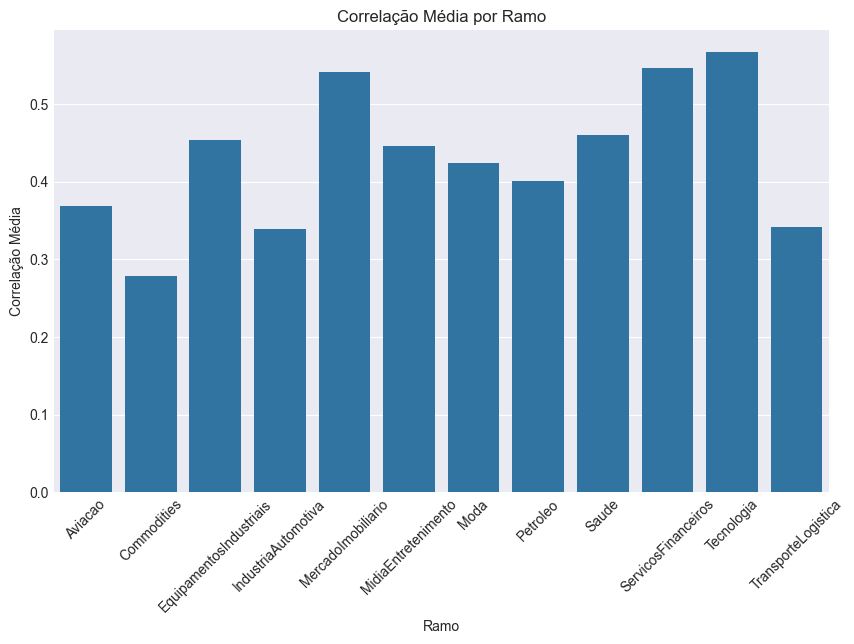

In [77]:
# Filtrar empresas que não são 'Futures'
df_empresas = df_resultados[df_resultados['Ramo'] != 'Futures']

# Verifique se df_empresas não está vazio
if df_empresas.empty:
    print("Nenhuma empresa encontrada após o filtro. Verifique os dados e o filtro aplicado.")
else:
    # Calcular correlação média por ramo
    media_correlacao_ramo = df_empresas.groupby('Ramo')['Correlacao'].mean().reset_index()

    # Exibir tabela de correlações médias
    display(media_correlacao_ramo)

    # Gráfico 4: Correlação Média por Ramo
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Ramo', y='Correlacao', data=media_correlacao_ramo)
    plt.title('Correlação Média por Ramo')
    plt.xlabel('Ramo')
    plt.ylabel('Correlação Média')
    plt.xticks(rotation=45)
    plt.show()

# Estudo 3

In [78]:
# Definir janela do evento (por exemplo, março de 2020)
data_evento_inicio = '2020-03-01'
data_evento_fim = '2022-03-31'

# Certificar-se de que o índice de dados_empresas está ordenado
dados_empresas = dados_empresas.sort_index()

# Filtrar dados no período do evento
dados_evento = dados_empresas.loc[data_evento_inicio:data_evento_fim].copy()

# Calcular retorno médio esperado antes do evento (por empresa)
dados_pre_evento = dados_empresas.loc[:'2020-02-29']
retorno_esperado = dados_pre_evento.groupby('Simbolo')['Retorno_Acao'].mean().reset_index()
retorno_esperado.rename(columns={'Retorno_Acao': 'Retorno_Acao_Esperado'}, inplace=True)

# Juntar retorno esperado com dados do evento
dados_evento = dados_evento.reset_index().merge(retorno_esperado, on='Simbolo', how='left')

# Calcular retornos anormais
dados_evento['Retorno_Anormal'] = dados_evento['Retorno_Acao'] - dados_evento['Retorno_Acao_Esperado']


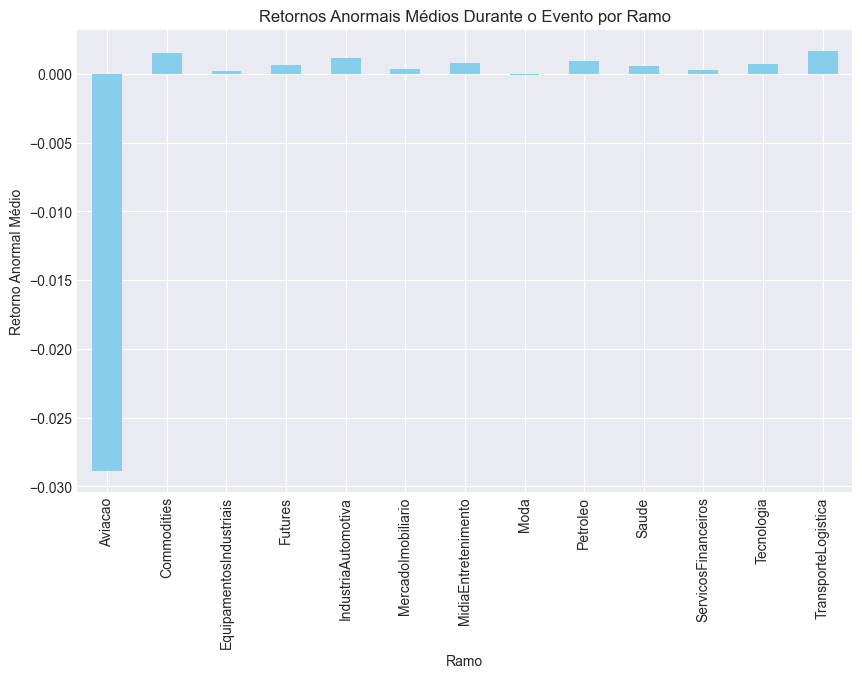

In [79]:
# Calcular retornos anormais médios por ramo durante o evento
retornos_anormais_ramo = dados_evento.groupby('Ramo')['Retorno_Anormal'].mean()

plt.figure(figsize=(10, 6))
retornos_anormais_ramo.plot(kind='bar', color='skyblue')
plt.title('Retornos Anormais Médios Durante o Evento por Ramo')
plt.xlabel('Ramo')
plt.ylabel('Retorno Anormal Médio')
plt.show()


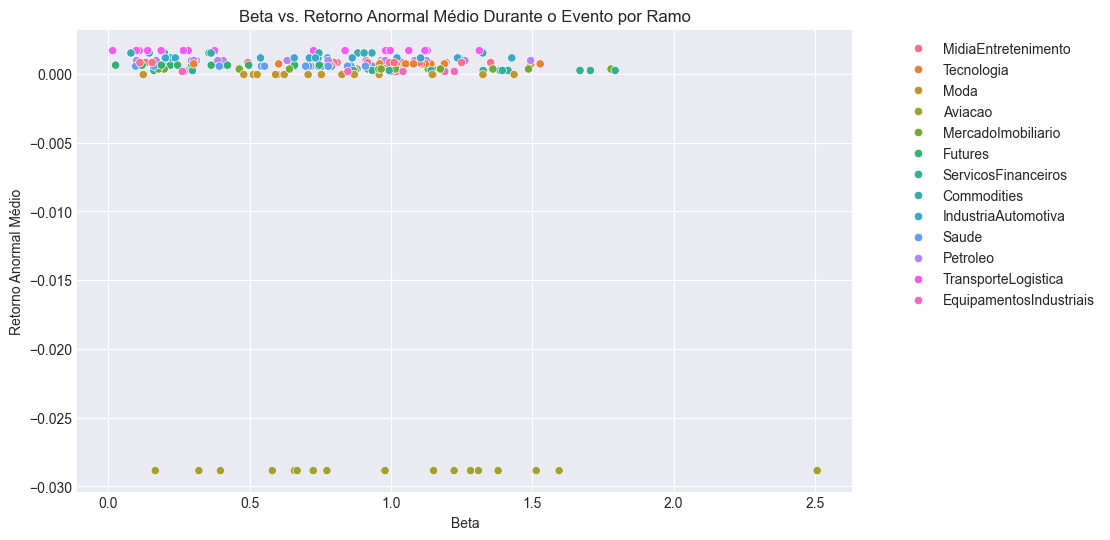

In [80]:
# Combinar dados para análise integrada
df_conclusao = df_resultados.merge(retornos_anormais_ramo.reset_index(), on='Ramo', how='left')
df_conclusao.rename(columns={'Retorno_Anormal': 'Retorno_Anormal_Medio'}, inplace=True)

# Análise de correlação entre Beta e Retorno Anormal Médio por Ramo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Beta', y='Retorno_Anormal_Medio', hue='Ramo', data=df_conclusao)
plt.title('Beta vs. Retorno Anormal Médio Durante o Evento por Ramo')
plt.xlabel('Beta')
plt.ylabel('Retorno Anormal Médio')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Conclusões baseadas nos dados


